In [ ]:
#DATE:21/08/25
#DAY:THURSDAY                                                                                                                                                                                               #DAY:THURSDAY

In [ ]:
# ACTIVATION FUNCTION AND THEIR EFFECTS ON MLP PERFORMANCE

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Load and preprocess MNIST dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Normalize the pixel values to [0,1]
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
# Flattern 28*28 image into vectors of size 784
x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1,784)

In [ ]:
#2 Function to build MLP with different activation functions
def build_mlp(activation_fn):
  model=models.Sequential()
  model.add(layers.Input(shape=(784,)))
  model.add(layers.Dense(128,activation=activation_fn))
  model.add(layers.Dense(64,activation=activation_fn))
  model.add(layers.Dense(10,activation='softmax'))
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model


In [ ]:
#3 Activations to compare
activations=['sigmoid','tanh','relu',tf.keras.layers.LeakyReLU(negative_slope=0.1)]
history_results={}
test_results={}


In [ ]:
#4 Train and evaluate MLP for each activation function
for act in activations:
  print(f"Training with activation:{act}")
  model = build_mlp(act)
  history = model.fit(x_train, y_train,
                      validation_split=0.2,
                      epochs=5,
                      batch_size=32,
                      verbose=1)

  history_results[str(act)] = history.history
  test_loss,test_acc=model.evaluate(x_test,y_test,verbose=1)
  test_results[str(act)]=test_acc
  print(f"Test accuracy for {act}: {test_acc:.4f}")

Training with activation:sigmoid
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7633 - loss: 0.9513 - val_accuracy: 0.9344 - val_loss: 0.2278
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9349 - loss: 0.2180 - val_accuracy: 0.9529 - val_loss: 0.1631
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9547 - loss: 0.1512 - val_accuracy: 0.9599 - val_loss: 0.1358
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9681 - loss: 0.1079 - val_accuracy: 0.9679 - val_loss: 0.1123
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9752 - loss: 0.0856 - val_accuracy: 0.9691 - val_loss: 0.1011
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9670 - loss: 0.1038
Test accuracy for sigmoid: 0.9706
Training with activation:tanh
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8693 - loss: 0.4602 - val_accuracy: 0.9511 - val_loss: 0.1677
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step -

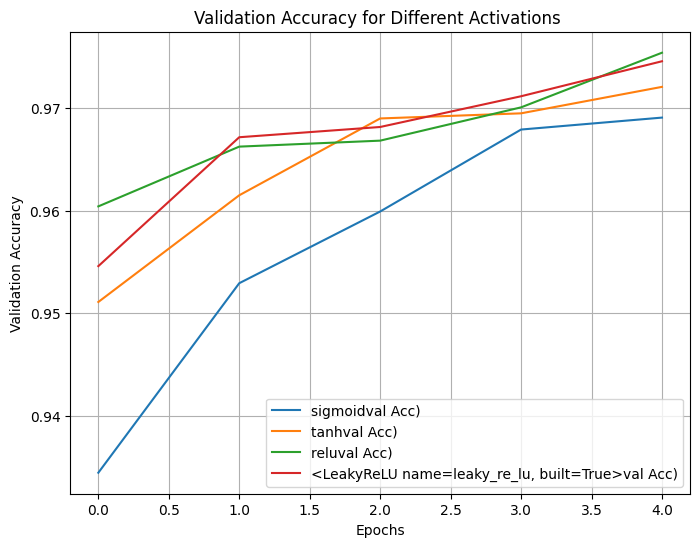

In [ ]:
#5 plot accuracy curves for each activation
plt.figure(figsize=(8,6))
for act, hist in history_results.items():
  plt.plot(hist['val_accuracy'],label=f'{act}val Acc)')
plt.title("Validation Accuracy for Different Activations ")
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

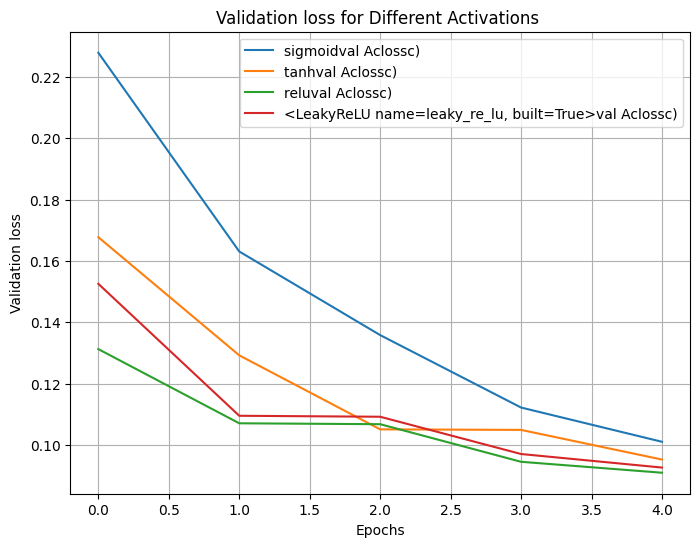

In [ ]:
#6 plot loss curves for each activation
plt.figure(figsize=(8,6))
for act, hist in history_results.items():
  plt.plot(hist['val_loss'],label=f'{act}val Aclossc)')
plt.title("Validation loss for Different Activations ")
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#7 print the final comparision table
print("\n Final Test Accuracy comparisions:")
for act, acc in test_results.items():
  print(f"{act}: {acc:.4f})")


 Final Test Accuracy comparisions:
sigmoid: 0.9706)
tanh: 0.9725)
relu: 0.9761)
<LeakyReLU name=leaky_re_lu, built=True>: 0.9757)
